In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import copy, math

In [72]:
customers=pd.read_csv(r"C:\Users\THAZEEL\Desktop\EcommerceCustomers1.csv")

In [73]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [74]:
#customers.describe()

In [75]:
#customers.info()

In [76]:
#sns.set_palette("Blues_r")
#sns.set_style('whitegrid')


<AxesSubplot: xlabel='Time on Website', ylabel='Yearly Amount Spent'>

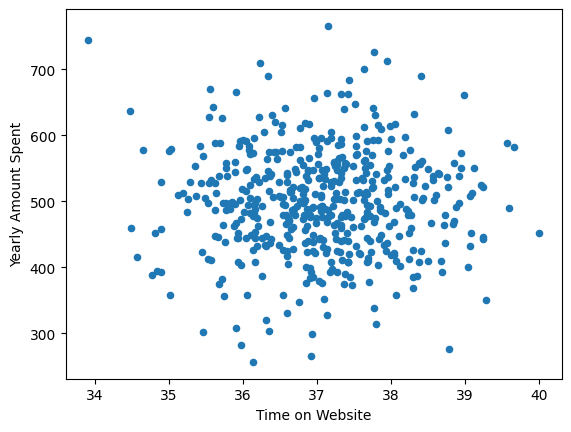

In [77]:
#plt.scatter('Time on Website','Yearly Amount Spent',marker='x',c='r')
customers.plot.scatter(x='Time on Website',y='Yearly Amount Spent')

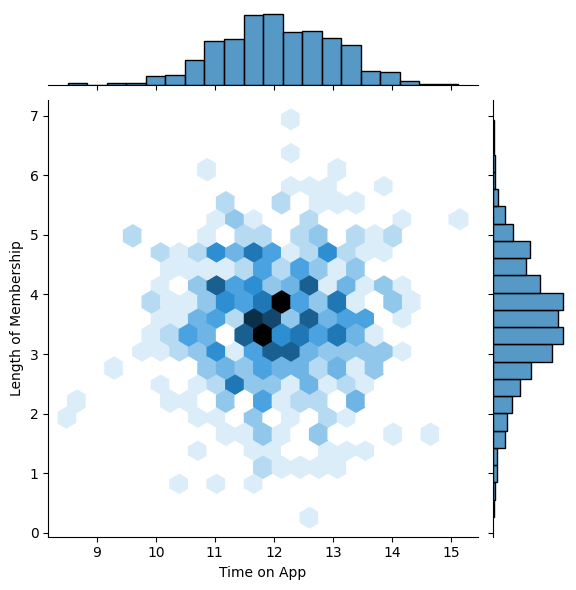

In [78]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

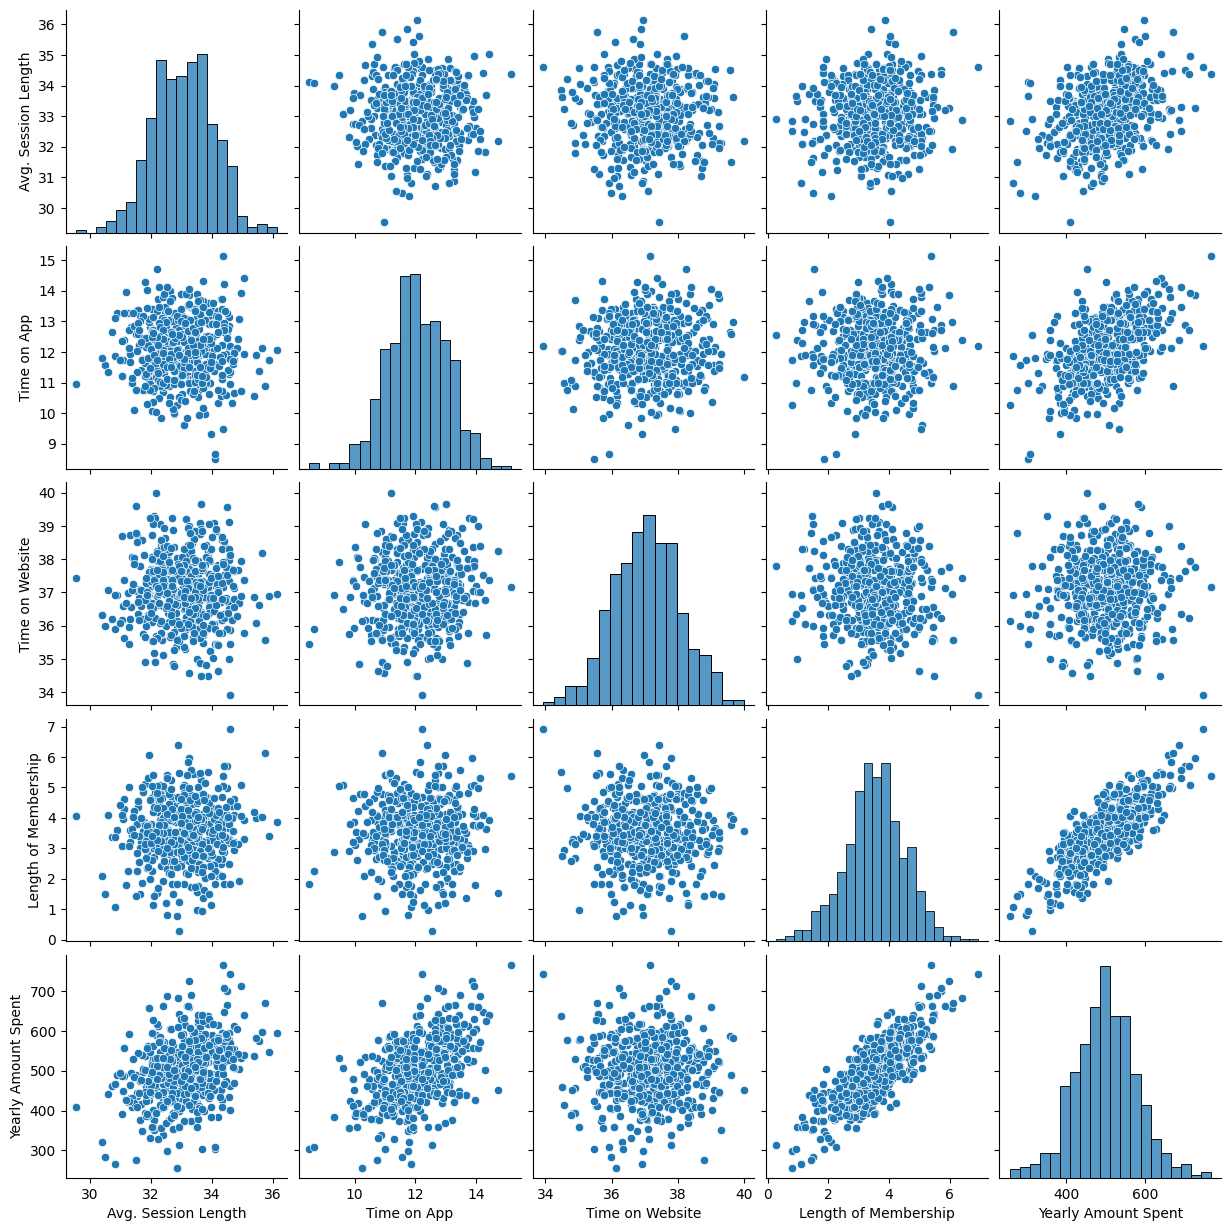

In [79]:
sns.pairplot(customers)

In [80]:
X=customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
Y=customers['Yearly Amount Spent']

In [81]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [83]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])


In [84]:
m=X_train.shape[0]
cost = 0.0
print(m)
for i in range(m):                                
 f_wb_i = np.dot(X_train.iloc[i], w_init) + b_init           #(n,)(n,) = scalar (see np.dot)
       #scalar
cost = cost / (2 * m)
print(cost)                   #scalar    
  


350
0.0


In [85]:
def predict_single_loop(x, w, b): 
    n = x.shape[0]
    p = 0
    p=np.dot(x.iloc[0],w)         
    p = p + b                
    return p

In [86]:
"""x_vec=X_train.iloc[0]
print(x_vec)
# make a prediction
f_wb = predict_single_loop(X_train, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")"""


'x_vec=X_train.iloc[0]\nprint(x_vec)\n# make a prediction\nf_wb = predict_single_loop(X_train, w_init, b_init)\nprint(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")'

In [87]:
def compute_cost(x, y, w, b):

  m = x.shape[0]
  cost = 0.0
  
  for i in range(m):                                
    f_wb_i = np.dot(x.iloc[i], w) + b           #(n,)(n,) = scalar (see np.dot)
    cost = cost + (f_wb_i - y.iloc[i])**2       #scalar
  cost = cost / (2 * m)                   #scalar    
  return cost

In [88]:

cost = compute_cost(X_train, Y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1202474.240163795


In [93]:
def compute_gradient(X, y, w, b): 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X.iloc[i], w) + b) - y.iloc[i]   
        
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X.iloc[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [94]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, Y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1547.1669010350474
dj_dw at initial w,b: 
 [-51129.9079264  -18643.12942065 -57419.74299743  -5562.89231147]


In [95]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
   
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [96]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 3.75e-6
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, Y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train.iloc[i], w_final) + b_final:0.2f}, target value: {Y_train.iloc[i]}")

Iteration    0: Cost 124849.39   
Iteration  100: Cost 19571.92   
Iteration  200: Cost  5016.64   
Iteration  300: Cost  3002.97   
Iteration  400: Cost  2723.08   
Iteration  500: Cost  2682.87   
Iteration  600: Cost  2675.79   
Iteration  700: Cost  2673.30   
Iteration  800: Cost  2671.44   
Iteration  900: Cost  2669.67   
b,w found by gradient descent: 0.19,[6.30445496 2.39368717 6.9764348  0.89437849] 
prediction: 487.90, target value: 443.9656268
prediction: 496.30, target value: 556.2981412
prediction: 500.62, target value: 549.1315733
prediction: 505.31, target value: 487.379306
prediction: 504.58, target value: 561.516532
prediction: 518.28, target value: 537.8252823
prediction: 501.53, target value: 444.582165
prediction: 506.87, target value: 542.4124767
prediction: 514.27, target value: 549.0082269
prediction: 509.83, target value: 439.0747667
prediction: 481.52, target value: 432.7207178
prediction: 493.61, target value: 510.5394217
prediction: 499.45, target value: 626

In [97]:
lm = LinearRegression()
lm.fit(X_train,Y_train)



LinearRegression()

In [98]:
lm.coef_

array([25.98154972, 38.59015876,  0.19040527, 61.27909654])

In [99]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

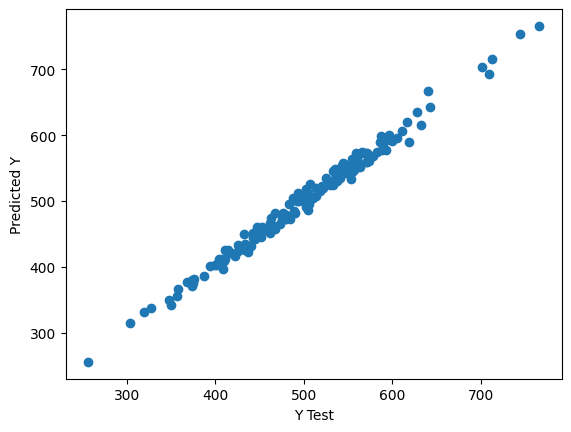

In [35]:

plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [132]:
predictions

array([456.44186103, 402.72005318, 409.25315391, 591.43103415,
       590.01437277, 548.82396614, 577.59737992, 715.44428138,
       473.78934447, 545.92113637, 337.85803152, 500.38506696,
       552.93478071, 409.60389636, 765.52590776, 545.83973746,
       693.25969118, 507.32416224, 573.10533158, 573.20766336,
       397.44989714, 555.09851085, 458.19868132, 482.66899927,
       559.26559583, 413.0094608 , 532.25727405, 377.65464808,
       535.02096538, 447.80070909, 595.54339585, 667.14347063,
       511.96042774, 573.30433971, 505.02260876, 565.3025466 ,
       460.38785388, 449.74727883, 422.8719342 , 456.5561526 ,
       598.10493705, 449.64517458, 615.34948987, 511.88078684,
       504.37568087, 515.95249251, 568.64597727, 551.61444683,
       356.55522421, 464.97598171, 481.6600772 , 534.22200247,
       256.28674007, 505.30810732, 520.01844439, 315.02987081,
       501.98080149, 387.03842653, 472.97419525, 432.87046751,
       539.79082184, 590.03070724, 752.86997652, 558.27

In [101]:
from sklearn import metrics

In [102]:
print('MAE :'," ", metrics.mean_absolute_error(Y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(Y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE :   7.228148667775292
MSE :   79.81305181284631
RMAE :   8.933815076038137


In [133]:
for i in range(150):
    print(f"sk{Y_train.iloc[i]-predictions[i]}, LR{Y_train.iloc[i]-np.dot(X_train.iloc[i], w_final) + b_final:0.2f}")


sk-12.47623423224411, LR-43.56
sk153.57808801526846, LR60.38
sk139.87841939100974, LR48.89
sk-104.05172814992244, LR-17.55
sk-28.49784077057359, LR57.31
sk-10.998683836664213, LR19.92
sk-133.0152149205465, LR-56.57
sk-173.03180468307698, LR35.92
sk75.21888243033982, LR35.12
sk-106.84636966728618, LR-70.37
sk94.8626862809084, LR-48.43
sk10.154354735854383, LR17.30
sk73.08389199371686, LR126.94
sk167.19865103952236, LR69.80
sk-338.3265228559713, LR-64.24
sk-13.122251763664735, LR28.03
sk-268.58441018127115, LR-64.75
sk-20.37710844278905, LR8.85
sk-35.18957868097584, LR28.88
sk-42.84519445714125, LR26.34
sk-4.639552142481875, LR-79.88
sk-97.25081495378203, LR-18.83
sk-6.076056215937626, LR-46.80
sk48.097719426483536, LR37.67
sk-57.39116552801477, LR2.69
sk168.78933689722203, LR58.59
sk6.684700445199269, LR37.06
sk100.60747831956911, LR-12.78
sk23.40629182182738, LR57.16
sk58.623150912789356, LR5.29
sk-122.18290025487198, LR-25.45
sk-156.10468453022867, LR7.67
sk-10.2111944364176, LR2.85
s

In [134]:
sumlr=0
sumsk=0
for i in range(150):
    sumsk=sumsk+(Y_train.iloc[i]-predictions[i])
    sumlr=sumlr+(Y_train.iloc[i]-(np.dot(X_train.iloc[i], w_final) + b_final))
print(sumsk/m)
print(sumlr/m)

-0.9415929469409486
-0.4386281197011778


C:\Users\THAZEEL\AppData\Local\Temp\ipykernel_17016\702322255.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test - predictions,bins=50)


<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Density'>

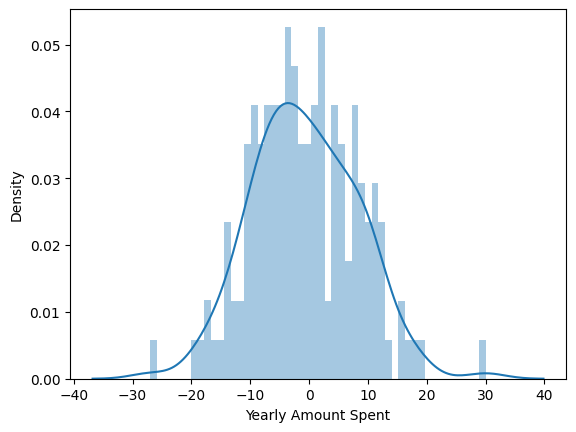

In [127]:
sns.distplot(Y_test - predictions,bins=50)

In [104]:
coeffecients = pd.DataFrame(lm.coef_,X.columns,columns=['coeffecients'])
coeffecients

,coeffecients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [135]:
for i in range(150):
    print(f"prediction LR: {np.dot(X_train.iloc[i], w_final) + b_final:0.2f}, prediction: {predictions[i]}, Target{Y_train.iloc[i]}")

prediction LR: 487.90, prediction: 456.4418610322441, Target443.9656268
prediction LR: 496.30, prediction: 402.72005318473157, Target556.2981412
prediction LR: 500.62, prediction: 409.25315390899027, Target549.1315733
prediction LR: 505.31, prediction: 591.4310341499224, Target487.379306
prediction LR: 504.58, prediction: 590.0143727705736, Target561.516532
prediction LR: 518.28, prediction: 548.8239661366642, Target537.8252823
prediction LR: 501.53, prediction: 577.5973799205465, Target444.582165
prediction LR: 506.87, prediction: 715.4442813830769, Target542.4124767
prediction LR: 514.27, prediction: 473.78934446966014, Target549.0082269
prediction LR: 509.83, prediction: 545.9211363672862, Target439.0747667
prediction LR: 481.52, prediction: 337.8580315190916, Target432.7207178
prediction LR: 493.61, prediction: 500.3850669641456, Target510.5394217
prediction LR: 499.45, prediction: 552.9347807062832, Target626.0186727
prediction LR: 507.38, prediction: 409.6038963604776, Target576.